# Retail sales


The datset contains transactinal data from a retail buisness. Each row represents a single transaction, with detailed information about the customer, product, payment, and sales details. Below is a description of the key features in the data set

1.CustomerID: Aunique identifier for each customer.

2.ProductID: A unique identifier for each product.

3.Quantity: The number of units purchased in a transaction

4.Price: the price per unit of a product

5.TransactionData : The date and time when the transaction occured.

6.PaymentMethod: The method of payment used eg Cash, Credit Card

7.StoreLocation: Location of the store where the particular transaction took place.

8.Productcategory: The category os product sold eg books, Clothing etc.

9.DiscountApplied(%): The percentage of discount applied to the transaction.

10.Totalamount: The final amount paid for transaction after applying the discount.



# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
df=pd.read_csv("Retail_Transaction_Dataset.csv")

## Viewing Dataset

In [3]:
print(df.head(10))

   CustomerID ProductID  Quantity      Price   TransactionDate PaymentMethod  \
0      109318         C         7  80.079844  12/26/2023 12:32          Cash   
1      993229         C         4  75.195229  08-05-2023 00:00          Cash   
2      579675         A         8  31.528816  03-11-2024 18:51          Cash   
3      799826         D         5  98.880218  10/27/2023 22:00        PayPal   
4      121413         A         7  93.188512  12/22/2023 11:38          Cash   
5      463050         D         3  54.093152    8/15/2023 4:24          Cash   
6      888163         D         7  13.121937   12/26/2023 5:32        PayPal   
7      843385         A         8  56.025164  10-11-2023 06:48    Debit Card   
8      839609         B         5  23.857981   2/27/2024 11:13   Credit Card   
9      184135         D         4  63.342777  11-05-2023 01:46    Debit Card   

                                       StoreLocation ProductCategory  \
0            176 Andrew Cliffs\nBaileyfort, HI 

In [4]:
print(df.tail(10))

       CustomerID ProductID  Quantity      Price   TransactionDate  \
99990      392198         C         2  56.957692  08-10-2023 07:36   
99991      472251         B         4  77.927041   3/22/2024 17:41   
99992      530236         A         1  82.566022   1/17/2024 22:51   
99993      248780         B         4  92.839338  06-03-2023 03:53   
99994      877546         A         5  53.600296    6/29/2023 3:36   
99995      726461         A         2  56.078258   7/17/2023 16:59   
99996      328056         A         6  88.516406    5/30/2023 9:04   
99997      887304         B         4  72.385564    8/25/2023 7:59   
99998      326401         C         5  66.542239  02-05-2024 19:45   
99999      771566         C         5  38.087766  02-04-2024 11:53   

      PaymentMethod                                      StoreLocation  \
99990        PayPal   80618 Logan Mission\nNorth Christopher, MI 54170   
99991    Debit Card  4171 Martha Expressway Suite 374\nAlyssastad, ...   
99992  

In [5]:
print(df.shape)

(100000, 10)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB
None


# Data Cleaning

### Checking for Null values

In [7]:
print(df.isna().sum())

CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64


### Checking for duplicate values

In [8]:
print(df.duplicated().sum())

0


In [9]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"],errors="coerce")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     60439 non-null   datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.6+ MB


# Statistical Analyses

In [11]:
numerical_coloumns=["Quantity","Price","DiscountApplied(%)","TotalAmount"]
subset=df[numerical_coloumns]

### Mean,Median,Stdev,percentile,min,max

In [12]:
print(df.describe())

          CustomerID       Quantity          Price  \
count  100000.000000  100000.000000  100000.000000   
mean   500463.982180       5.009290      55.067344   
min        14.000000       1.000000      10.000430   
25%    250693.750000       3.000000      32.549474   
50%    499679.000000       5.000000      55.116789   
75%    751104.750000       7.000000      77.456763   
max    999997.000000       9.000000      99.999284   
std    288460.917524       2.579808      25.971567   

                     TransactionDate  DiscountApplied(%)    TotalAmount  
count                          60439       100000.000000  100000.000000  
mean   2023-11-03 18:58:43.949436416           10.020155     248.334955  
min              2023-04-29 22:27:00            0.000046       8.274825  
25%              2023-07-30 11:09:30            5.001013      95.163418  
50%              2023-10-30 08:53:00           10.030353     200.368393  
75%              2024-01-29 07:21:00           15.018367     362.0099

### Covariance

In [13]:
Cov_matrix=subset.cov()
print(Cov_matrix)

                      Quantity        Price  DiscountApplied(%)   TotalAmount
Quantity              6.655410     0.119704           -0.054151    329.399331
Price                 0.119704   674.522291           -0.010239   3049.867973
DiscountApplied(%)   -0.054151    -0.010239           33.403008    -93.713329
TotalAmount         329.399331  3049.867973          -93.713329  34060.471253


### Correlation

In [14]:
Cor_matrix=subset.corr()
print(Cor_matrix)

                    Quantity     Price  DiscountApplied(%)  TotalAmount
Quantity            1.000000  0.001787           -0.003632     0.691847
Price               0.001787  1.000000           -0.000068     0.636294
DiscountApplied(%) -0.003632 -0.000068            1.000000    -0.087858
TotalAmount         0.691847  0.636294           -0.087858     1.000000


<Axes: >

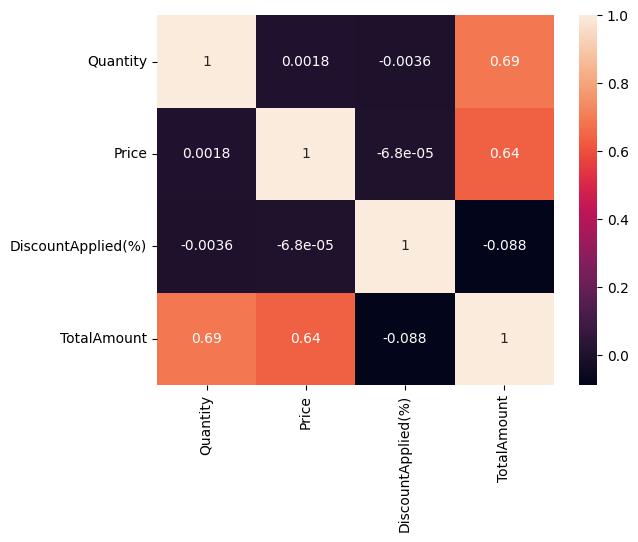

In [15]:
sns.heatmap(Cor_matrix,annot=True)

In [16]:
print(df.groupby("ProductID").groups)

{'A': [2, 4, 7, 23, 25, 26, 27, 32, 43, 46, 51, 53, 60, 61, 63, 71, 74, 84, 85, 90, 93, 94, 100, 106, 117, 119, 121, 122, 126, 130, 132, 133, 136, 137, 143, 145, 148, 149, 155, 157, 158, 161, 164, 166, 167, 169, 175, 190, 192, 194, 203, 207, 211, 218, 226, 230, 231, 235, 236, 241, 242, 244, 251, 256, 261, 262, 274, 278, 281, 288, 292, 305, 310, 313, 317, 319, 329, 331, 333, 335, 345, 346, 349, 351, 361, 367, 373, 374, 384, 387, 391, 392, 393, 399, 401, 403, 405, 409, 410, 416, ...], 'B': [8, 12, 15, 18, 19, 20, 24, 28, 35, 36, 39, 42, 44, 47, 49, 50, 62, 68, 73, 75, 76, 83, 87, 89, 95, 97, 98, 104, 107, 113, 114, 128, 131, 138, 140, 146, 160, 163, 168, 170, 172, 177, 178, 180, 187, 196, 199, 208, 212, 215, 217, 219, 220, 224, 228, 232, 234, 237, 240, 243, 245, 246, 249, 250, 257, 260, 263, 266, 272, 273, 280, 284, 285, 293, 296, 299, 301, 303, 308, 311, 314, 321, 322, 327, 328, 334, 338, 341, 342, 344, 353, 354, 355, 358, 359, 363, 365, 369, 375, 377, ...], 'C': [0, 1, 10, 22, 31, 37, 

<Axes: ylabel='CustomerID'>

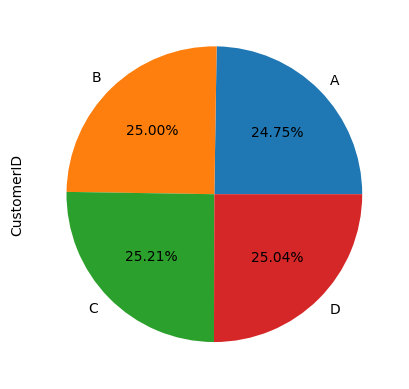

In [17]:
df.groupby("ProductID")["CustomerID"].count().plot(kind="pie",autopct="%0.2f%%")

<Axes: ylabel='CustomerID'>

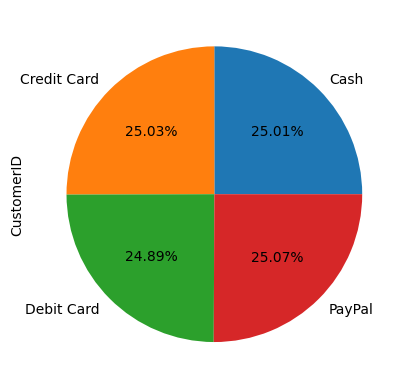

In [18]:
df.groupby("PaymentMethod")["CustomerID"].count().plot(kind="pie",autopct="%0.2f%%")

<Axes: ylabel='CustomerID'>

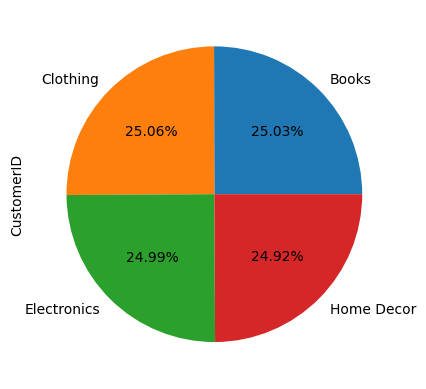

In [19]:
df.groupby("ProductCategory")["CustomerID"].count().plot(kind="pie",autopct="%0.2f%%")

<Axes: xlabel='ProductCategory'>

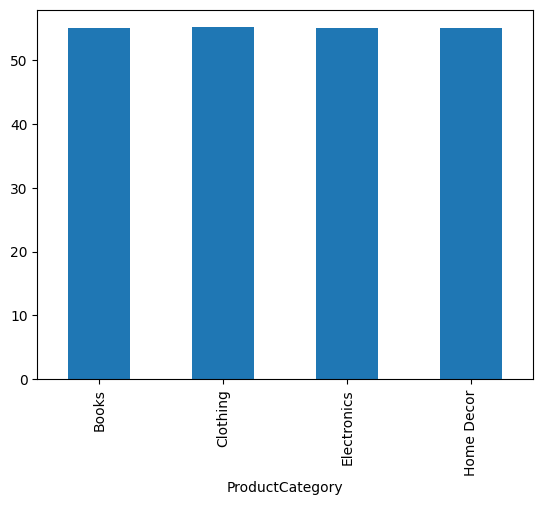

In [20]:
df.groupby("ProductCategory")["Price"].mean().plot(kind="bar")

 Using pivot table to understand mean price of eachcategory of products

In [21]:
pivot = pd.pivot_table(data=df,index="ProductID",values="Price",aggfunc="median")
print(pivot)

               Price
ProductID           
A          54.718512
B          55.262522
C          55.277659
D          55.148817


1. Which product category poduces the highest total revenue?

In [22]:
pivot = pd.pivot_table(data=df,index="ProductCategory",values="TotalAmount",aggfunc=sum)
print(pivot)

                  TotalAmount
ProductCategory              
Books            6.257837e+06
Clothing         6.205502e+06
Electronics      6.196735e+06
Home Decor       6.173421e+06


C:\Users\Linnes P J\AppData\Local\Temp\ipykernel_16548\3831307595.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(data=df,index="ProductCategory",values="TotalAmount",aggfunc=sum)


Axes(0.125,0.11;0.775x0.77)


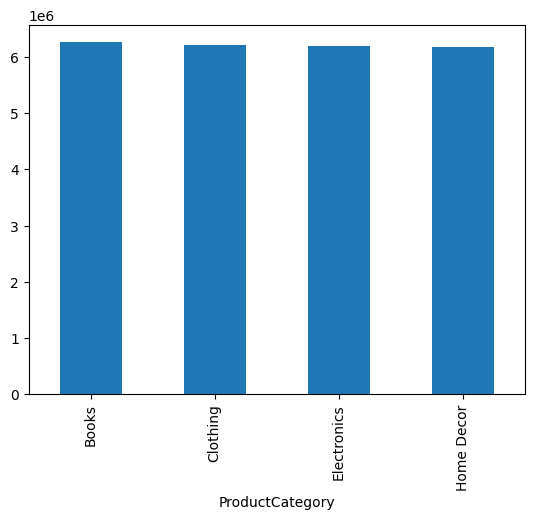

In [23]:
category_revenue = df.groupby("ProductCategory")["TotalAmount"].sum().plot(kind="bar")
print(category_revenue)

From this pivot table its clear the product category of Books has generated highest revenue

2. What is the average discount applied across all transactions

In [24]:
average_discount=df["DiscountApplied(%)"].mean()
print(average_discount)

10.02015453917535


The average discount applied across all transactions is 10%

3.Which store location has the highest sales volume (in terms of quantity)?

In [25]:
pivot=pd.pivot_table(data=df,index="StoreLocation",values="Quantity",aggfunc=sum)
print(pivot)

C:\Users\Linnes P J\AppData\Local\Temp\ipykernel_16548\1766137440.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot=pd.pivot_table(data=df,index="StoreLocation",values="Quantity",aggfunc=sum)


                                                    Quantity
StoreLocation                                               
000 Alexander Spurs\nRothtown, IL 35945                    8
000 Allen Rue\nKiddstad, MS 61368                          4
000 Ashley Camp Suite 144\nWest Natasha, SC 03524          4
000 Bennett Mountains Apt. 210\nLevifort, ME 61462         1
000 Carpenter Curve\nEast Brett, AS 53903                  2
...                                                      ...
Unit 9983 Box 8478\nDPO AA 68111                           3
Unit 9986 Box 8172\nDPO AP 21999                           3
Unit 9989 Box 6060\nDPO AE 61725                           4
Unit 9998 Box 1568\nDPO AA 59676                           2
Unit 9999 Box 0761\nDPO AE 02129                           4

[100000 rows x 1 columns]


In [26]:
highest_sales_vol=df.groupby("StoreLocation")["Quantity"].sum()
print(highest_sales_vol)
print("The store location with highest sales is =  ",highest_sales_vol.idxmax())

StoreLocation
000 Alexander Spurs\nRothtown, IL 35945               8
000 Allen Rue\nKiddstad, MS 61368                     4
000 Ashley Camp Suite 144\nWest Natasha, SC 03524     4
000 Bennett Mountains Apt. 210\nLevifort, ME 61462    1
000 Carpenter Curve\nEast Brett, AS 53903             2
                                                     ..
Unit 9983 Box 8478\nDPO AA 68111                      3
Unit 9986 Box 8172\nDPO AP 21999                      3
Unit 9989 Box 6060\nDPO AE 61725                      4
Unit 9998 Box 1568\nDPO AA 59676                      2
Unit 9999 Box 0761\nDPO AE 02129                      4
Name: Quantity, Length: 100000, dtype: int64
The store location with highest sales is =   000 Thompson Plain Apt. 126
Richardburgh, MA 35975


The store location with highest sales is =   000 Thompson Plain Apt. 126
Richardburgh, MA 35975

4.What is the correlation between discounts and total amount spent per transaction?

In [27]:
cor1=df["DiscountApplied(%)"].corr(df["TotalAmount"])
print("The correlation between discount and total amount is : ",cor1)
#sns.heatmap(cor1,annot=True)
#plt.show()


The correlation between discount and total amount is :  -0.08785839233500856


The correlation between discount and total amount is a negative corelation

5.How does the total revenue compare across different payment methods?

PaymentMethod
Debit Card     6.202999e+06
Credit Card    6.203538e+06
Cash           6.207206e+06
PayPal         6.219753e+06
Name: TotalAmount, dtype: float64
Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Total revenue')

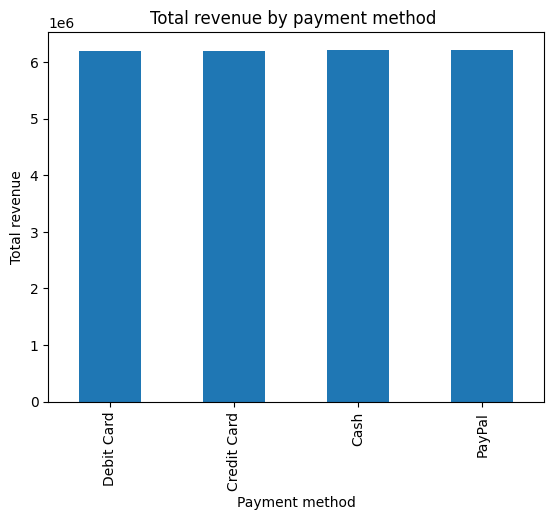

In [28]:
payment=df.groupby("PaymentMethod")["TotalAmount"].sum().sort_values()
print(payment)
print(payment.plot(kind="bar"))
plt.title("Total revenue by payment method ")
plt.xlabel("Payment method")
plt.ylabel("Total revenue")

6.Who are the top 5 customers by total spending?

In [29]:
df.head()


,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,NaT,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,NaT,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


CustomerID
32895     2002.072661
796166    1647.517063
980072    1636.196111
340516    1604.858454
392763    1587.407591
Name: TotalAmount, dtype: float64
Axes(0.125,0.11;0.775x0.77)


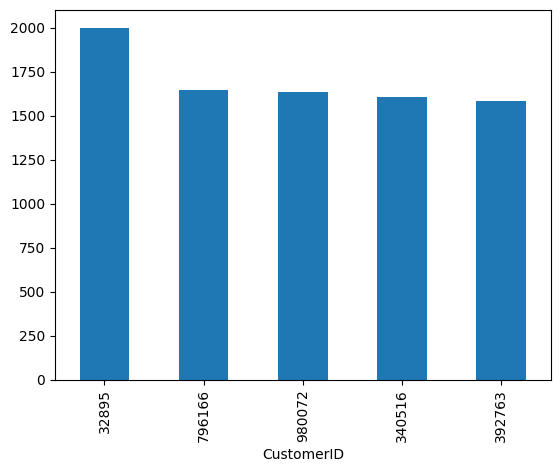

In [30]:
Customers=df.groupby("CustomerID")["TotalAmount"].sum().sort_values(ascending=False)
c1=Customers.head()
print(c1)
print(c1.plot(kind="bar"))

The top 5 customers are customers having id 32895, 796166, 980072, 340516, 392763

7. What is the average spending per transaction for each product category?

ProductCategory
Clothing       247.665324
Home Decor     247.699770
Electronics    247.968578
Books          250.003477
Name: TotalAmount, dtype: float64
Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Average spending per transaction by Product Category')

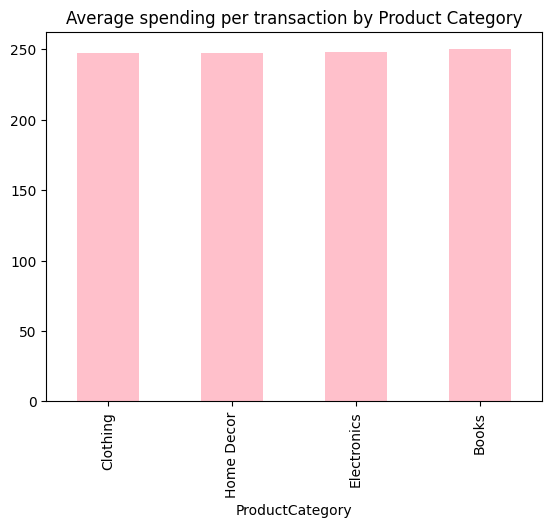

In [31]:
average=df.groupby("ProductCategory")["TotalAmount"].mean().sort_values()
print(average)
print(average.plot(kind="bar",color="pink"))
plt.title("Average spending per transaction by Product Category")

8. Are certain customers more likely to purchase specific product categories (e.g., books, clothing)?

ProductCategory
Home Decor     24923
Electronics    24990
Books          25031
Clothing       25056
Name: CustomerID, dtype: int64
Axes(0.125,0.11;0.775x0.77)


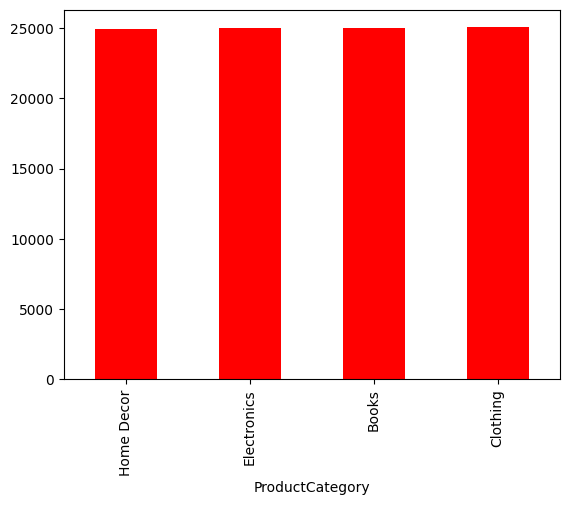

In [32]:
certain=df.groupby("ProductCategory")["CustomerID"].count().sort_values()
print(certain)
print(certain.plot(kind="bar",color="red"))

9. Which product ID is purchased most frequently?

In [33]:
Purchase=df.groupby("ProductID")["TransactionDate"].count().sort_values(ascending=False)
print(Purchase)
print("The most purchased product id is : ", Purchase.idxmax())

ProductID
C    15215
B    15194
D    15088
A    14942
Name: TransactionDate, dtype: int64
The most purchased product id is :  C


The most purchased Product ID is C

10. How does spending vary by payment method (e.g., cash vs. credit card)?

PaymentMethod
PayPal         6.219753e+06
Cash           6.207206e+06
Credit Card    6.203538e+06
Debit Card     6.202999e+06
Name: TotalAmount, dtype: float64


<Axes: xlabel='PaymentMethod'>

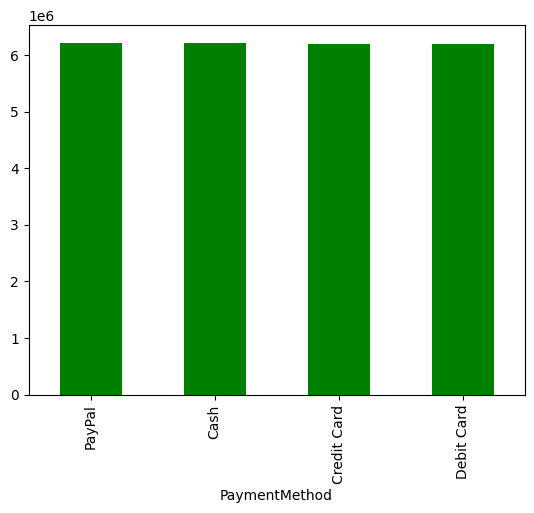

In [34]:
spending=df.groupby("PaymentMethod")["TotalAmount"].sum().sort_values(ascending=False)
print(spending)
spending.plot(kind="bar",color="green")

More spending is done using cash compared to credit card

11. What is the trend in sales over time (e.g., by month or quarter)?

YearMonth
2023-04    6.084079e+04
2023-05    1.273383e+06
2023-06    1.250849e+06
2023-07    1.312135e+06
2023-08    1.290943e+06
2023-09    1.219630e+06
2023-10    1.248334e+06
2023-11    1.217753e+06
2023-12    1.313731e+06
2024-01    1.316285e+06
2024-02    1.156935e+06
2024-03    1.302998e+06
2024-04    1.063900e+06
Freq: M, Name: TotalAmount, dtype: float64


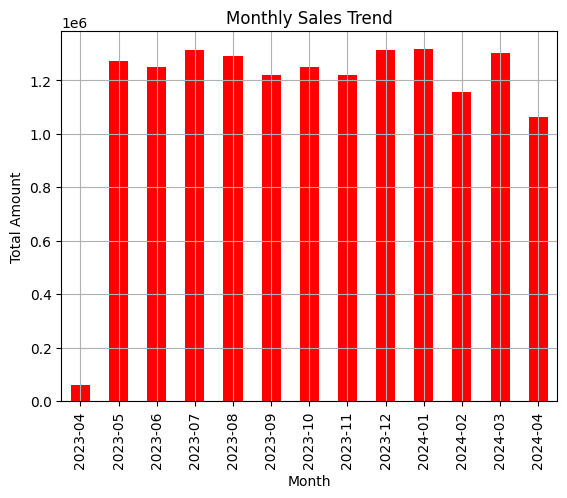

In [35]:
df["YearMonth"]=df["TransactionDate"].dt.to_period('M')
trend=df.groupby("YearMonth")["TotalAmount"].sum().sort_index()
print(trend)
trend.plot(kind="bar",color="red")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.grid(alpha=1)

12. Which dates or time periods have the highest sales volume?

In [36]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,YearMonth
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,2023-12
1,993229,C,4,75.195229,NaT,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546,NaT
2,579675,A,8,31.528816,NaT,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651,NaT
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769,2023-10
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484,2023-12


TransactionDate
2024-02-21 08:48:00    2004.658402
2023-09-17 19:15:00    1883.941787
2023-10-21 13:21:00    1692.523813
2023-06-30 12:18:00    1668.164787
2024-02-24 00:39:00    1667.918591
                          ...     
2024-02-17 12:31:00       8.627679
2023-06-28 10:08:00       8.565011
2024-01-13 21:29:00       8.536545
2024-01-28 01:48:00       8.359100
2024-02-27 16:16:00       8.274825
Name: TotalAmount, Length: 55021, dtype: float64


The date which had highest sales volume is  2024-02-21 08:48:00


<Axes: xlabel='TransactionDate'>

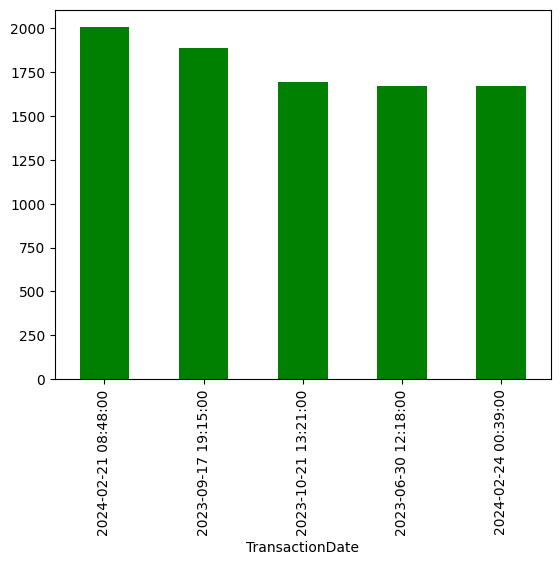

In [37]:
period=df.groupby("TransactionDate")["TotalAmount"].sum().sort_values(ascending=False)
print(period)
print("The date which had highest sales volume is ",period.idxmax())
month_bar=period.head()
month_bar.plot(kind="bar",color="green")

13. Does the average discount percentage vary by time of year?

YearMonth
2023-04     2616.180618
2024-04    43893.557365
2024-02    47422.702431
2023-09    48620.454062
2023-11    49173.805371
2023-06    49607.233666
2023-05    50187.466366
2023-08    51389.762465
2023-10    51622.403051
2023-12    52217.962427
2024-03    52569.029652
2023-07    52699.721839
2024-01    53283.891240
Freq: M, Name: DiscountApplied(%), dtype: float64

Highest discount given =  2024-01 
Lowest discount given =  2023-04 



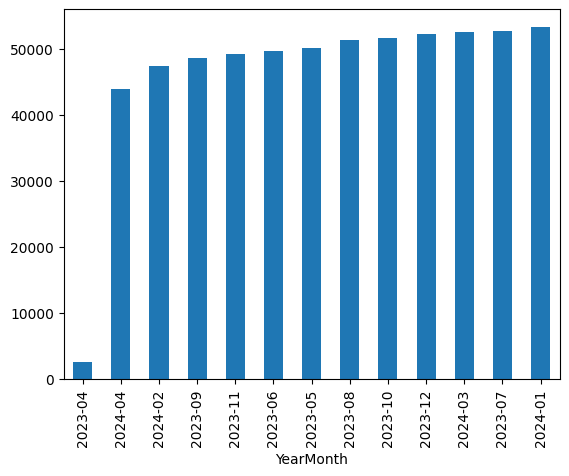

In [38]:
ree=df.groupby("YearMonth")["DiscountApplied(%)"].sum().sort_values()
print(ree)
ree.plot(kind="bar")
print("\nHighest discount given = ",ree.idxmax(),"\nLowest discount given = ",ree.idxmin(),"\n")

14. How does the average transaction size (quantity ) change over time?

In [39]:
df.head() 

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,YearMonth
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,2023-12
1,993229,C,4,75.195229,NaT,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546,NaT
2,579675,A,8,31.528816,NaT,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651,NaT
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769,2023-10
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484,2023-12


YearMonth
2023-04    4.696970
2023-10    4.944085
2024-04    4.949257
2024-02    4.968008
2024-01    4.985502
2023-07    5.008541
2023-05    5.015748
2023-08    5.018397
2023-11    5.021748
2023-09    5.037751
2023-12    5.055246
2024-03    5.057099
2023-06    5.093047
Freq: M, Name: Quantity, dtype: float64


Text(0, 0.5, 'Quantity')

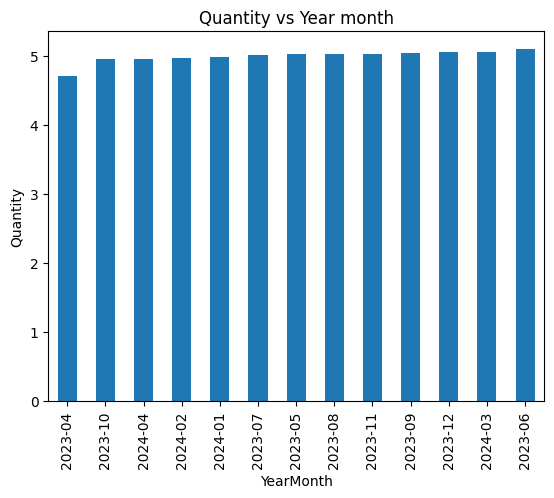

In [40]:
df["TransactionDate"]=pd.to_datetime(df["TransactionDate"])
df["YearMonth"]=df["TransactionDate"].dt.to_period('M')
quantity = df.groupby("YearMonth")["Quantity"].mean().sort_values()
print(quantity)
quantity.plot(kind="bar")
plt.title("Quantity vs Year month")
plt.ylabel("Quantity")

Highest sales quantity is in june 2023 and lowest is in april 2023

15. Which payment method is most used during specific months?

PaymentMethod  Cash  Credit Card  Debit Card  PayPal
Month                                               
April          1163         1189        1183    1104
August         1286         1281        1276    1321
December       1304         1308        1298    1303
February       1133         1192        1196    1199
January        1289         1341        1320    1361
July           1280         1320        1382    1287
June           1209         1237        1230    1257
March          1323         1298        1326    1272
May            1336         1235        1178    1331
November       1197         1213        1251    1259
October        1290         1366        1193    1248
September      1291         1185        1216    1182


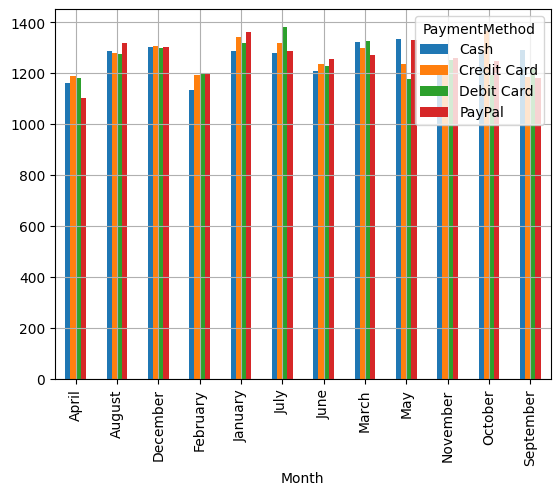

In [41]:
df["Month"]=df["TransactionDate"].dt.month_name()
monthly_pay=df.groupby(["Month","PaymentMethod"]).size().unstack(fill_value=0)
print(monthly_pay)
monthly_pay.plot(kind="bar")
plt.grid()

# Summary

- The product category with highest total revenue is Books
- The average discount applied is 10% across all transaction
- The store location with highest sales is =   000 Thompson Plain Apt. 126 Richardburgh, MA 35975
- The correlation between discounts and total amount spend is -0.08 which is a negative correlation
- When comparing the total revenue across different payment methods the highest amount of money transaction is done using PayPal, and the lowest is done using Debit card.
- The top five customers are customers with id 32895, 796166, 980072, 340516, and 392763
- The average spending per transaction for each category is Clothing: 248, Home Decor: 248, Electronics: 248, Books:250
- The product category which is more likely to be purchased by certain people is Clothing.
- The most purchased product ID is C
- When comparing the payment methods cash and credit card more transaction takes place using cash than credit card.
- The transaction date which had highest sales volume is 21 February 2024
- The discount percentage vary by time of the year it will be the lowest in April and highest in January.
- The average quantity of products sold will be the highest in June and lowest in April
-  